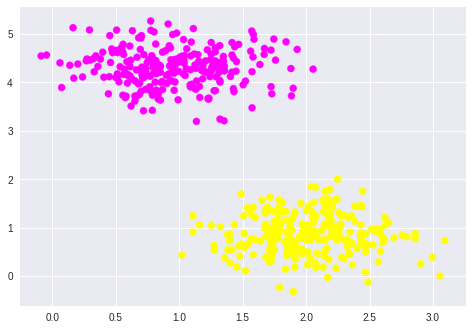

In [28]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 

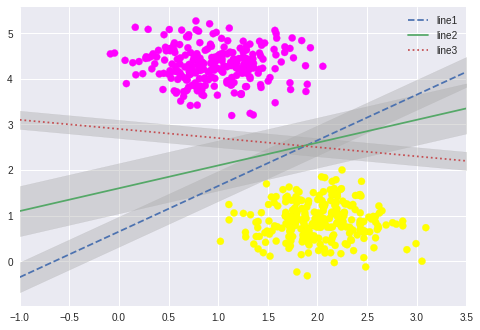

In [29]:
# creating line space between -1 to 3.5  
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 
  
# plot a line between the different sets of data 
label_line = zip(["line1", "line2", "line3"], ["--", "-", ":"])
label_color = list(label_line)
for i, (m, b, d) in enumerate([(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]): 
    yfit = m * xfit + b 
#     plt.plot(xfit, yfit, '-k', label= label_color[i][0],
    plt.plot(xfit, yfit, linestyle=label_color[i][1], label= label_color[i][0])
#              color=label_color[i][1]) 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4) 

plt.legend()
plt.xlim(-1, 3.5); 
plt.show() 

Coefficients: 
 [[2.015]]
R2 score : 0.93
Mean squared error: 0.42
actual= [7.5]  observed= [8.05666667]
actual= [8.5]  observed= [9.06416667]
actual= [11.]  observed= [10.07166667]
actual= [11.7]  observed= [11.28066667]
actual= [11.5]  observed= [12.08666667]
actual= [14.8]  observed= [14.10166667]
MSE [0.41627538]
variance 0.047920258659886215
average of errors  0.41627537500000117
average of observed values 10.833333333333334
total sum of squares [33.51333333]
ẗotal sum of residuals  [2.49765225]
r2 calculated [0.92547288]
Variance score: 0.93


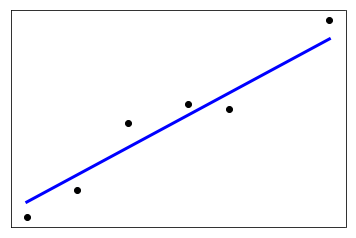

In [11]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

reg = linear_model.LinearRegression()
ar = np.array([[[1],[2],[3]],
               [[2.01],[4.03],[6.04]]])
y = ar[1,:]
x = ar[0,:]
reg.fit(x,y)
print('Coefficients: \n', reg.coef_)
xTest = np.array([[4],[4.5], [5], [5.6], [6], [7]])
ytest =  np.array([[7.5],[8.5],[11], [11.7],[11.5], [14.8]])

preds = reg.predict(xTest)
print("R2 score : %.2f" % r2_score(ytest,preds))
print("Mean squared error: %.2f" % mean_squared_error(ytest,preds))

er = []
g = 0
for i in range(len(ytest)):
    print( "actual=", ytest[i], " observed=", preds[i])
    x = (ytest[i] - preds[i]) **2
    er.append(x)
    g = g + x
    
x = 0
for i in range(len(er)):
   x = x + er[i]

print ("MSE", x / len(er))

v = np.var(er)
print ("variance", v)

print ("average of errors ", np.mean(er))

m = np.mean(ytest)
print ("average of observed values", m)

y = 0
for i in range(len(ytest)):
    y = y + ((ytest[i] - m) ** 2)

print ("total sum of squares", y)
print ("ẗotal sum of residuals ", g)
print ("r2 calculated", 1 - (g / y))
print('Variance score: %.2f' % r2_score(ytest, preds))

# Plot outputs
plt.scatter(xTest, ytest,  color='black')
plt.plot(xTest, preds, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


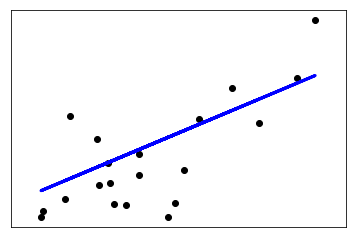

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

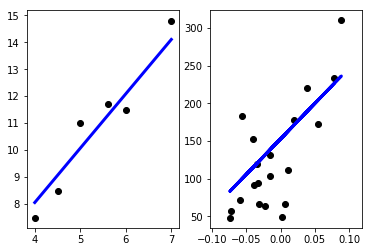

In [13]:
plt.subplot(1,2,1)
plt.scatter(xTest, ytest,  color='black')
plt.plot(xTest, preds, color='blue', linewidth=3)

plt.subplot(1,2,2)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

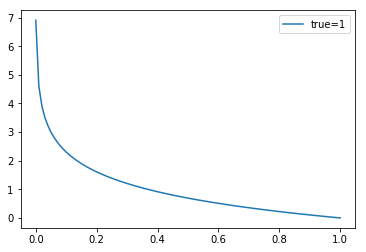

In [10]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1], eps=1e-3) for x in yhat]
# plot input to loss
plt.plot(yhat, losses_1, label='true=1')
plt.legend()
plt.show()

AUC: 0.895


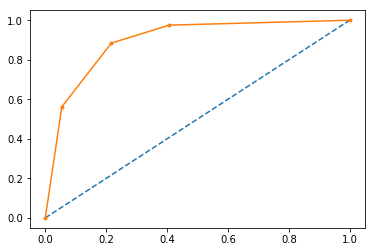

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

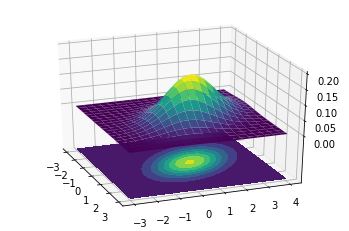

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# Our 2-dimensional distribution will be over variables X and Y
df = sns.load_dataset('iris')
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

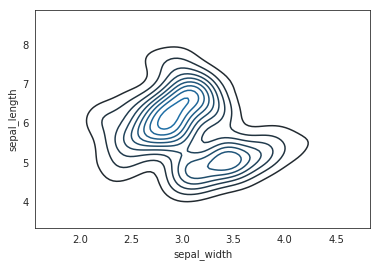

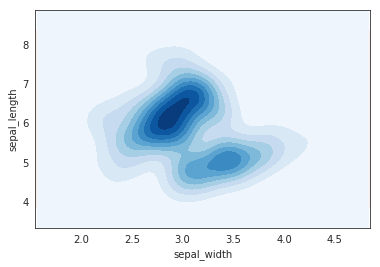

In [6]:
import seaborn as sns
df = sns.load_dataset('iris')
 
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(df.sepal_width, df.sepal_length)
plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()